<a href="https://colab.research.google.com/github/sampathkarri/GarbageClassifierApp/blob/main/Final_Garbage_classification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!ls extracted_garbage
!ls extracted_imbalanced_garbage


cardboard  glass  metal  paper	plastic  trash
cardboard  glass  metal  paper	plastic  trash


Found 240 files belonging to 6 classes.
Found 180 files belonging to 6 classes.
✅ Balanced Classes: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
✅ Imbalanced Classes: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


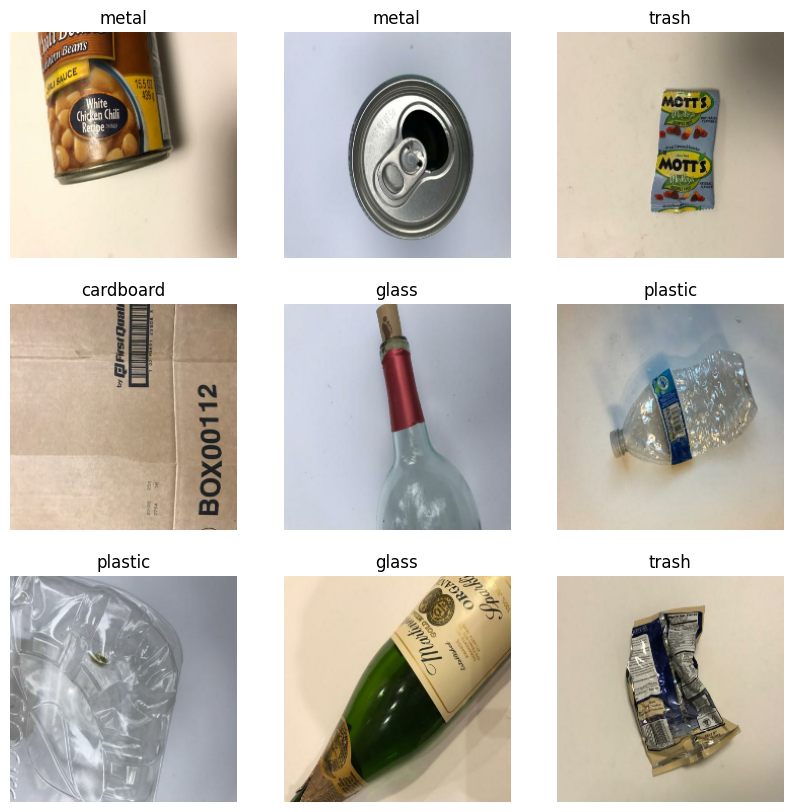

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load balanced dataset
balanced_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "extracted_garbage", image_size=(224, 224), batch_size=32)

# Load imbalanced dataset
imbalanced_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "extracted_imbalanced_garbage", image_size=(224, 224), batch_size=32)

print("✅ Balanced Classes:", balanced_ds.class_names)
print("✅ Imbalanced Classes:", imbalanced_ds.class_names)

# Show sample images
plt.figure(figsize=(10, 10))
for images, labels in balanced_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(balanced_ds.class_names[labels[i]])
        plt.axis("off")


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [ ]:
encoder = LabelEncoder()

# Encode Balanced Labels
y_bal_encoded = encoder.fit_transform(y_bal)

# Encode Imbalanced Labels
y_imbal_encoded = encoder.transform(y_imbal)  # Use same encoder to keep label mapping consistent


In [ ]:
# Balanced split
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(
    X_bal, y_bal_encoded, test_size=0.2, stratify=y_bal_encoded, random_state=42)

# Imbalanced split
X_train_imbal, X_test_imbal, y_train_imbal, y_test_imbal = train_test_split(
    X_imbal, y_imbal_encoded, test_size=0.2, stratify=y_imbal_encoded, random_state=42)


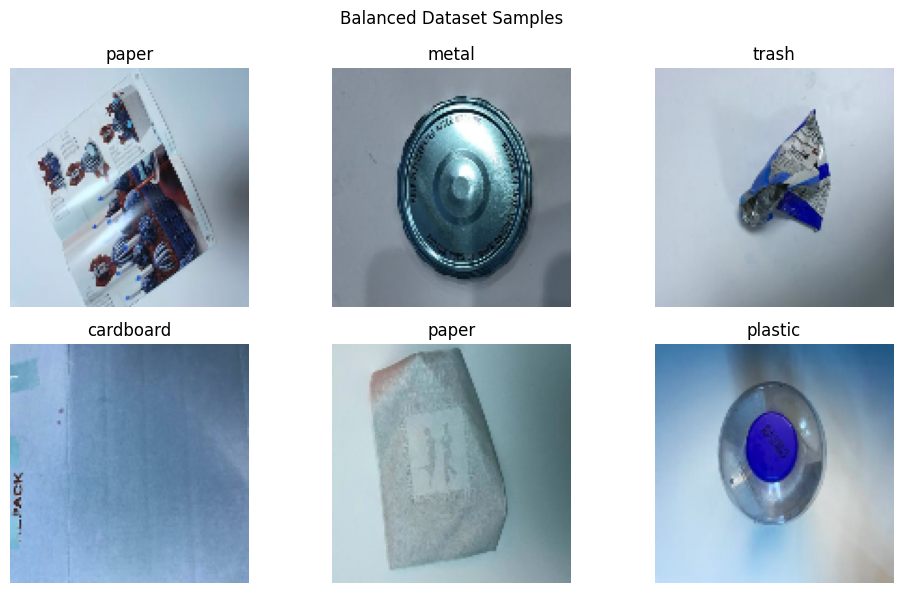

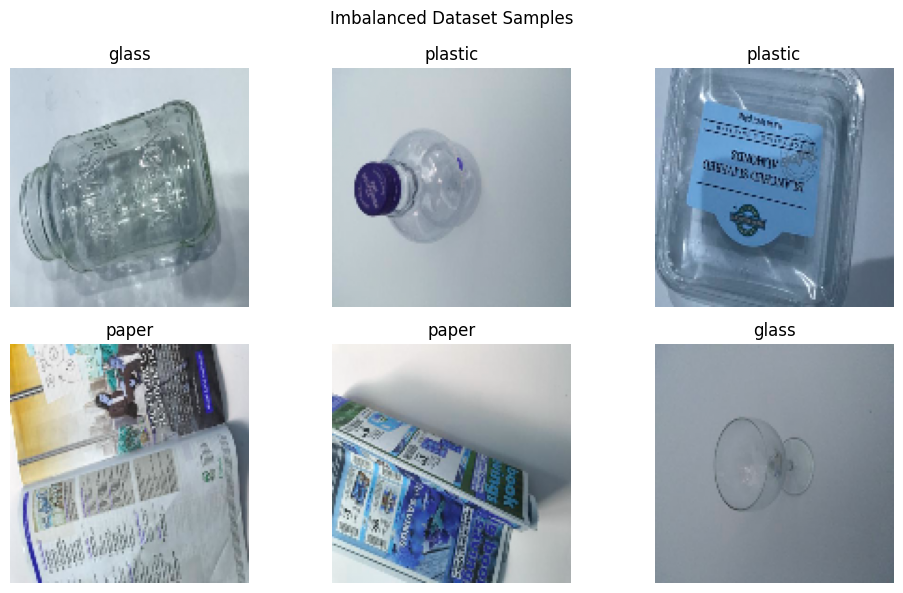

In [ ]:
def show_samples(X, y, encoder, title):
    plt.figure(figsize=(10, 6))
    for i in range(6):
        plt.subplot(2, 3, i+1)
        plt.imshow(X[i])
        plt.title(encoder.inverse_transform([y[i]])[0])
        plt.axis('off')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Show some images from each dataset
show_samples(X_train_bal, y_train_bal, encoder, "Balanced Dataset Samples")
show_samples(X_train_imbal, y_train_imbal, encoder, "Imbalanced Dataset Samples")


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (128, 128)

# Data augmentation for robustness
train_aug = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create data generators
train_gen_bal = train_aug.flow(X_train_bal, y_train_bal, batch_size=32)
val_gen_bal = ImageDataGenerator().flow(X_test_bal, y_test_bal, batch_size=32)

train_gen_imbal = train_aug.flow(X_train_imbal, y_train_imbal, batch_size=32)
val_gen_imbal = ImageDataGenerator().flow(X_test_imbal, y_test_imbal, batch_size=32)


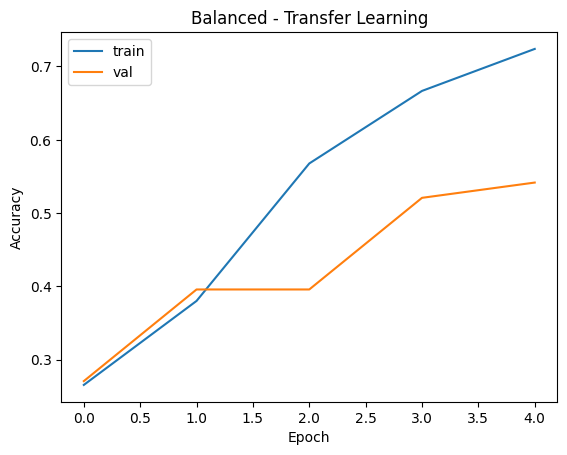

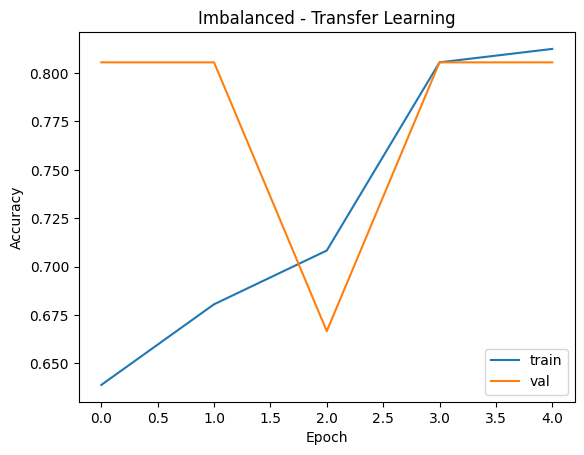

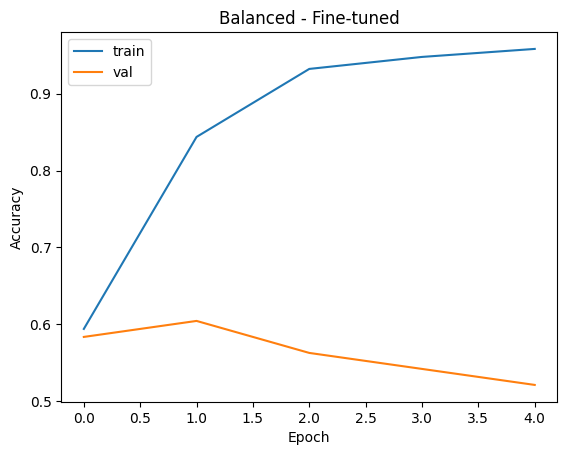

In [ ]:
import matplotlib.pyplot as plt

def plot_acc(hist, title):
    plt.plot(hist.history['accuracy'], label='train')
    plt.plot(hist.history['val_accuracy'], label='val')
    plt.title(title); plt.xlabel('Epoch'); plt.ylabel('Accuracy')
    plt.legend(); plt.show()

plot_acc(history_bal, "Balanced - Transfer Learning")
plot_acc(history_imbal, "Imbalanced - Transfer Learning")
plot_acc(ft_history_bal, "Balanced - Fine-tuned")


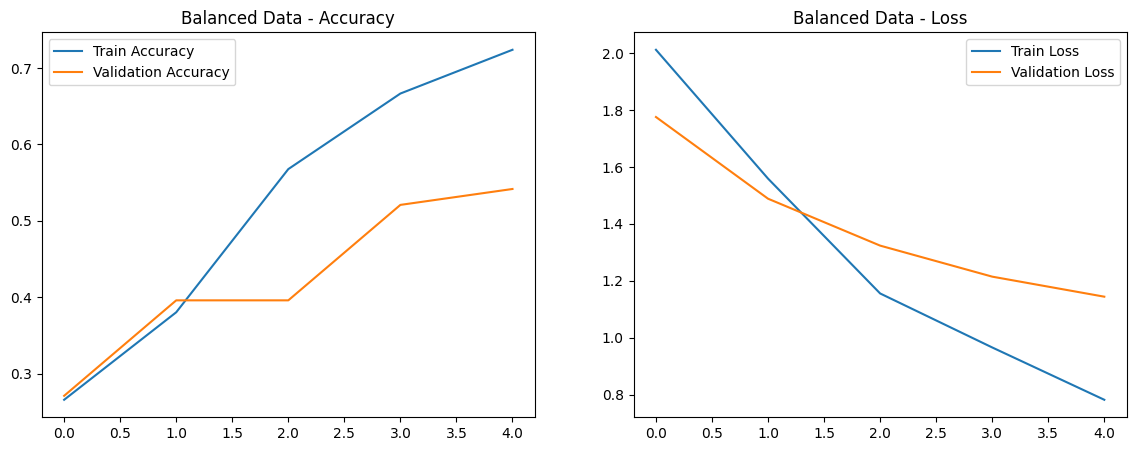

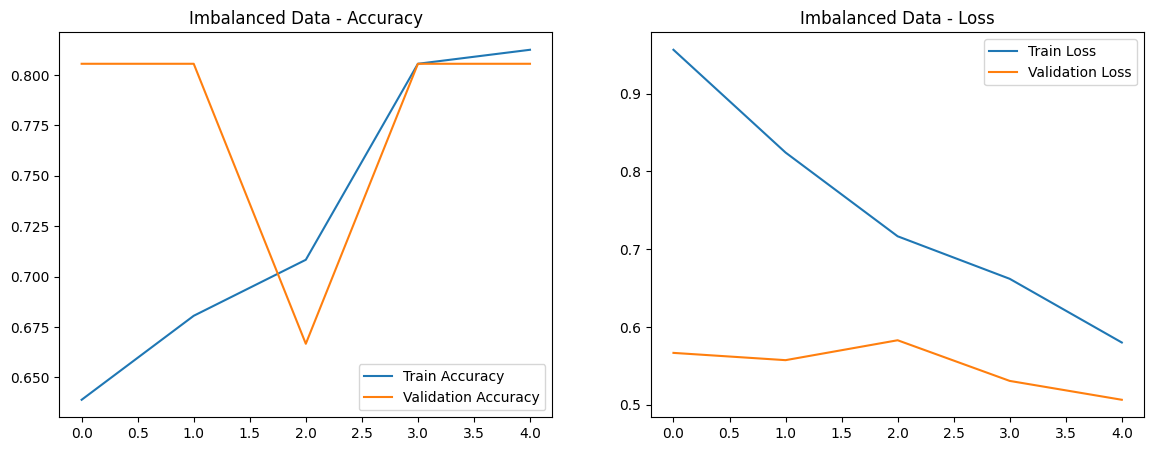

In [ ]:
def plot_history(history, title="Model Performance"):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(14,5))

    plt.subplot(1,2,1)
    plt.plot(acc, label='Train Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(loss, label='Train Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.legend()
    plt.show()

# Call it
plot_history(history_bal, "Balanced Data")
plot_history(history_imbal, "Imbalanced Data")


In [ ]:
# Evaluate balanced model
loss, acc = model.evaluate(X_test_bal, y_test_bal)
print(f"Balanced Test Accuracy: {acc*100:.2f}%")

# Evaluate imbalanced model
loss2, acc2 = model.evaluate(X_test_imbal, y_test_imbal)
print(f"Imbalanced Test Accuracy: {acc2*100:.2f}%")


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 402ms/step - accuracy: 0.5451 - loss: 1.2347
Balanced Test Accuracy: 52.08%
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.8657 - loss: 0.3058
Imbalanced Test Accuracy: 86.11%


In [ ]:
import zipfile
import os
import shutil

# Clear old data if it exists
if os.path.exists("balanced_data_final"):
    shutil.rmtree("balanced_data_final")

# Extract your uploaded zip
with zipfile.ZipFile("/content/Balanced_garbage.zip", 'r') as zip_ref:
    zip_ref.extractall("balanced_data_final")


In [ ]:
for folder in os.listdir("balanced_data_final"):
    path = os.path.join("balanced_data_final", folder)
    if os.path.isdir(path):
        print(folder, "->", len(os.listdir(path)), "images")


cardboard -> 400 images
plastic -> 400 images
metal -> 400 images
paper -> 400 images
trash -> 400 images
glass -> 400 images


In [ ]:
import cv2
import numpy as np

def load_and_preprocess_data(directory):
    X, y = [], []
    for label in os.listdir(directory):
        class_path = os.path.join(directory, label)
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            try:
                img = cv2.imread(img_path)
                img = cv2.resize(img, (128, 128)) / 255.0
                X.append(img)
                y.append(label)
            except:
                pass
    return np.array(X), np.array(y)

X, y = load_and_preprocess_data("balanced_data_final")
print("✅ Data shape:", X.shape, y.shape)


✅ Data shape: (2400, 128, 128, 3) (2400,)


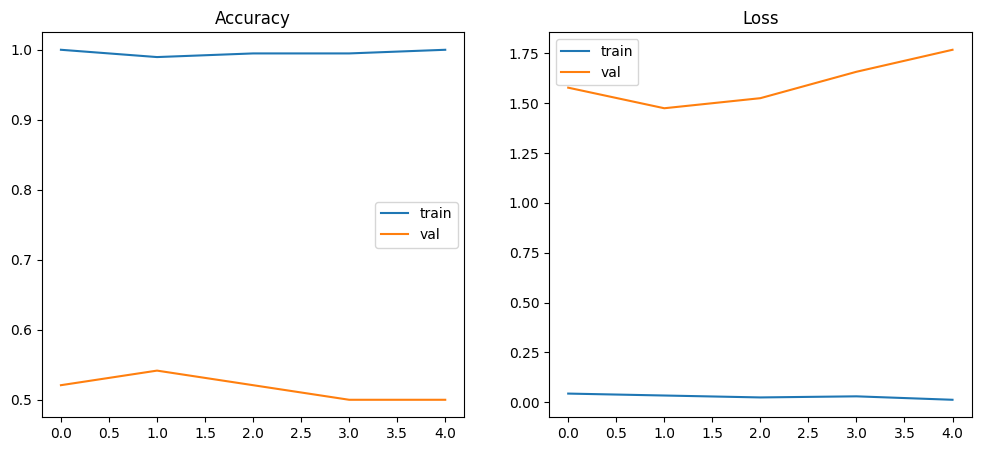

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step - accuracy: 0.5312 - loss: 1.7382
Test Accuracy: 50.00%
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step
              precision    recall  f1-score   support

   cardboard       1.00      0.62      0.77         8
       glass       0.62      0.62      0.62         8
       metal       1.00      0.12      0.22         8
       paper       0.33      0.12      0.18         8
     plastic       0.33      1.00      0.50         8
       trash       0.57      0.50      0.53         8

    accuracy                           0.50        48
   macro avg       0.64      0.50      0.47        48
weighted avg       0.64      0.50      0.47        48



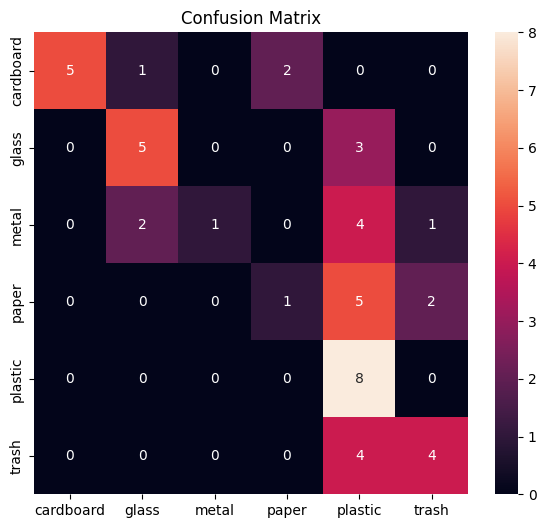

In [ ]:
# 1. Plot training history (accuracy + loss)
def plot_training(history):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='val')
    plt.title('Accuracy')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')
    plt.title('Loss')
    plt.legend()
    plt.show()

plot_training(fine_tune_history)

# 2. Evaluate on test set
loss, acc = model.evaluate(X_test_bal, y_test_bal, verbose=1)
print(f"Test Accuracy: {acc*100:.2f}%")

# 3. Generate Confusion Matrix & Classification Report
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = np.argmax(model.predict(X_test_bal), axis=1)
print(classification_report(y_test_bal, y_pred, target_names=encoder.classes_))

cm = confusion_matrix(y_test_bal, y_pred)
plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title("Confusion Matrix")
plt.show()

# 4. Save final model
model.save("garbage_classifier_effnetb0.keras")

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)


In [ ]:
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
print("Train Label Distribution:")
for cls, count in zip(unique, counts):
    print(f"{encoder.inverse_transform([cls])[0]} → {count}")


Train Label Distribution:
cardboard → 320
glass → 320
metal → 320
paper → 320
plastic → 320
trash → 320


15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 385ms/step

📋 Classification Report:

              precision    recall  f1-score   support

   cardboard       0.83      0.81      0.82        80
       glass       0.81      0.69      0.74        80
       metal       0.79      0.84      0.81        80
       paper       0.72      0.76      0.74        80
     plastic       0.70      0.79      0.74        80
       trash       0.93      0.86      0.90        80

    accuracy                           0.79       480
   macro avg       0.80      0.79      0.79       480
weighted avg       0.80      0.79      0.79       480



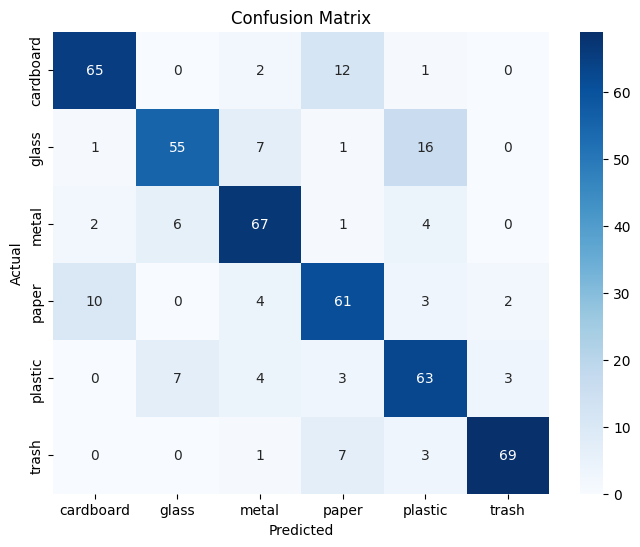

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Report
print("\n📋 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


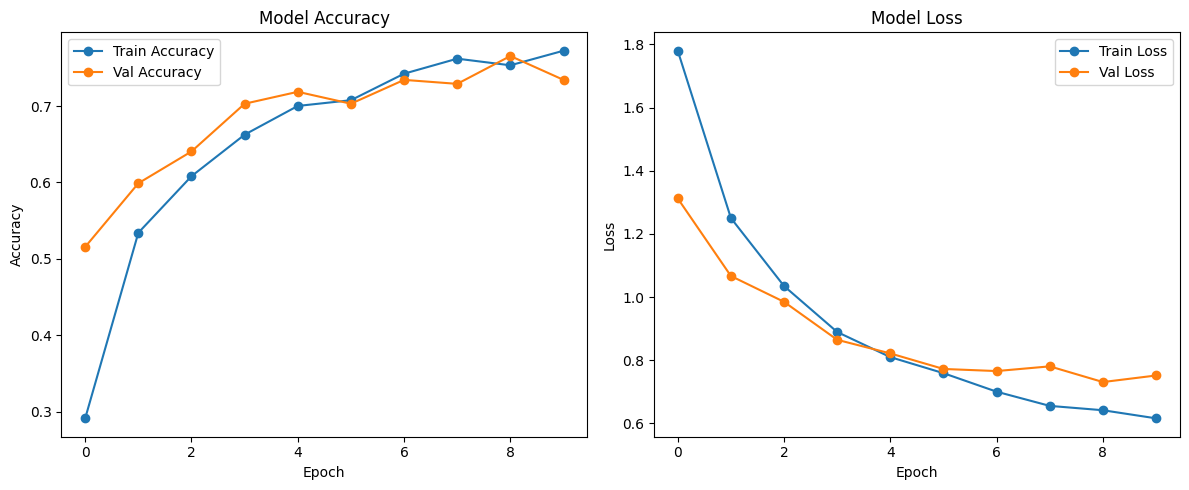

In [ ]:
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetV2B2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

# Define input shape
input_shape = (224, 224, 3)

# Load EfficientNetV2B2 base model
base_model = EfficientNetV2B2(weights='imagenet', include_top=False, input_shape=input_shape)
base_model.trainable = False  # Freeze base model initially

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(6, activation='softmax')(x)  # 6 classes for garbage types

# Final model
model = Model(inputs=base_model.input, outputs=outputs)

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# View structure
model.summary()


35839040/35839040 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          0 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ normalization[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │      4,608 │ stem_activation[… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 112, 112,  │         64 │ block1a_project_… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, 112, 112,  │          0 │ block1a_project_… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_co… │ (None, 112, 112,  │      2,304 │ block1a_project_… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_bn  │ (None, 112, 112,  │         64 │ block1b_project_… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_ac… │ (None, 112, 112,  │          0 │ block1b_project_… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_drop        │ (None, 112, 112,  │          0 │ block1b_project_… │
│ (Dropout)           │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_add (Add)   │ (None, 112, 112,  │          0 │ block1b_drop[0][… │
│                     │ 16)               │            │ block1a_project_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, 56, 56,    │      9,216 │ block1b_add[0][0] │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, 56, 56,    │        256 │ block2a_expand_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, 56, 56,    │          0 │ block2a_expand_b

 Total params: 8,950,500 (34.14 MB)

 Trainable params: 181,126 (707.52 KB)

 Non-trainable params: 8,769,374 (33.45 MB)

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Balanced_garbage (1).zip to Balanced_garbage (1).zip


In [ ]:
import zipfile
import os

zip_path = "Balanced_garbage (1).zip"  # Your uploaded file
extract_path = "garbage_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [ ]:
import os

for root, dirs, files in os.walk("garbage_data"):
    print("Subfolders:", dirs)
    break


Subfolders: ['cardboard', 'glass', 'plastic', 'trash', 'metal', 'paper']


In [ ]:
import tensorflow as tf

dataset_path = "garbage_data"  # ✅ now it's correct!

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(224, 224),
    batch_size=32
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(224, 224),
    batch_size=32
)

# For better performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)


Found 2400 files belonging to 6 classes.
Using 1920 files for training.
Found 2400 files belonging to 6 classes.
Using 480 files for validation.


In [6]:
\
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetV2B2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

# Dataset path (your extracted folder with class folders inside)
dataset_path = "garbage_data"

# Load training and validation datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(224, 224),
    batch_size=32
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(224, 224),
    batch_size=32
)

# Improve performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

# Load EfficientNetV2B2 as base model
base_model = EfficientNetV2B2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(6, activation='softmax')(x)  # 6 classes

model = Model(inputs=base_model.input, outputs=outputs)

# ✅ Use sparse loss for integer labels
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
model.fit(train_ds, validation_data=val_ds, epochs=10)


Found 2400 files belonging to 6 classes.
Using 1920 files for training.
Found 2400 files belonging to 6 classes.
Using 480 files for validation.
35839040/35839040 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 225s 3s/step - accuracy: 0.6037 - loss: 1.0539 - val_accuracy: 0.8854 - val_loss: 0.3421
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 257s 3s/step - accuracy: 0.8715 - loss: 0.4009 - val_accuracy: 0.9042 - val_loss: 0.3005
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - accuracy: 0.9087 - loss: 0.2918 - val_accuracy: 0.8979 - val_loss: 0.2732
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 204s 3s/step - accuracy: 0.9163 - loss: 0.2463 - val_accuracy: 0.9208 - val_loss: 0.2545
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 200s 3s/step - accuracy: 0.9357 - loss: 0.2102 - val_accuracy: 0.9146 - val_loss: 0.2452
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - accuracy: 0.9307 - loss: 0.1812 - val_accuracy: 0.9229 - val_loss: 0.2468
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 198s

In [7]:

  model.save("garbage_classifier_efficientnetv2b2.keras")

from google.colab import files
files.download("garbage_classifier_efficientnetv2b2.keras")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>